# Simple Binary Classification
### By J. Sebastian Tenjo G.

The Sonar Dataset involves the prediction of whether or not an object is a mine or a rock given the
strength of sonar returns at different angles. It is a binary (2-class) classification problem. The
number of observations for each class is not balanced. There are 208 observations with 60 input
variables and 1 output variable. The variable names are as follows:
Sonar returns at different angles
...
Class (M for mine and R for rock)
The baseline performance of predicting the most prevalent class is a classification accuracy of
approximately 53%. Top results achieve a classification accuracy of approximately 88%.

### 1. Split the data into training and tes (consider class imbalance)

In [279]:
#Importing the required data analysis libraries
using DataFrames
using CSV
using MLDataPattern
using StatsBase
using Printf
using ScikitLearn
using ScikitLearn: fit!, predict
using StatsBase: sample
using LinearAlgebra
using Statistics
using Plots

### Data pre-processing

In a first implementation of the models, it is observed that there are aspects to improve in terms of data format, so the pertinent improvements in format are added, and the processing is presented below.



In [280]:
#Reading data from the repository
DataSet = DataFrame(CSV.File("Data/sonar.csv", header=0))

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598
4,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598
5,0.0762,0.0666,0.0481,0.0394,0.059,0.0649,0.1209,0.2467,0.3564
6,0.0286,0.0453,0.0277,0.0174,0.0384,0.099,0.1201,0.1833,0.2105
7,0.0317,0.0956,0.1321,0.1408,0.1674,0.171,0.0731,0.1401,0.2083
8,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465
9,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684


In [281]:
#I will now confirm that the number of observations is not balanced 
rename!(DataSet, :Column61 => :label) #data set class labels
countmap(DataSet.label) #count amount of samples for each class

Dict{String1, Int64} with 2 entries:
  "M" => 111
  "R" => 97

In [282]:
using MLDataUtils
#Randomly splitting data into two disjoint subsets (the default data distribution is 70%-30%)
TrainSet, TestSet = splitobs(shuffleobs(DataSet))

(146×61 SubDataFrame
 Row │ Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  ⋯
     │ Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │  0.0201   0.0026   0.0138   0.0062   0.0133   0.0151   0.0541   0.021   ⋯
   2 │  0.0368   0.0403   0.0317   0.0293   0.082    0.1342   0.1161   0.0663
   3 │  0.0235   0.022    0.0167   0.0516   0.0746   0.1121   0.1258   0.1717
   4 │  0.0473   0.0509   0.0819   0.1252   0.1783   0.307    0.3008   0.2362
   5 │  0.0124   0.0433   0.0604   0.0449   0.0597   0.0355   0.0531   0.0343  ⋯
   6 │  0.0197   0.0394   0.0384   0.0076   0.0251   0.0629   0.0747   0.0578
   7 │  0.0093   0.0269   0.0217   0.0339   0.0305   0.1172   0.145    0.0638
   8 │  0.0223   0.0375   0.0484   0.0475   0.0647   0.0591   0.0753   0.0098
   9 │  0.0229   0.0369   0.004    0.0375   0.0455   0.1452   0.2211   0.1188  ⋯
  10 │  0.026    0.0192  

In [283]:
TrainSetF=TrainSet[:,1:60]; #train data set features
TestSetF=TestSet[:,1:60]; #test data set features
countmap(TestSet.label) 

Dict{String1, Int64} with 2 entries:
  "M" => 34
  "R" => 28

In a first installment, it is observed that it is necessary to modify the format of the data, along with some quantity balancing issues since the models implemented without this pre-processing could generate unwanted error levels, for this the first step is a heat map and the observation of the correlation.

In [284]:
Data_csv = CSV.read("Data/sonar.csv",DataFrame,header=0);
data = DataFrame(Data_csv);

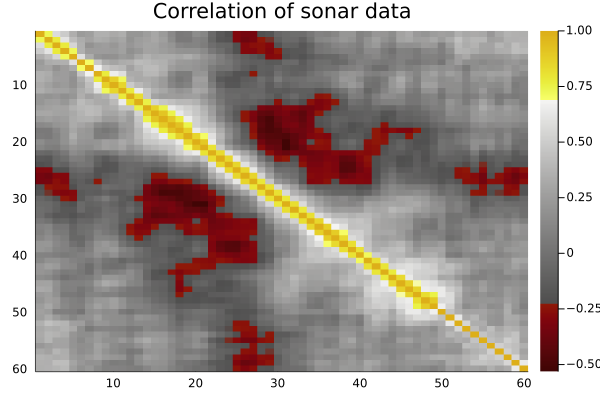

In [285]:
using Statistics
data_num = select(data, Not(:Column61));
matrix_data = Matrix(data_num);
correlation = cor(matrix_data);
using Plots
heatmap(correlation, yflip=true, type="heatmap",color=:oxy,title= "Correlation of sonar data")

It is found that the data in general are independent and most of them present a correlation index higher than 0.75. There is also a set of outlier data that have been plotted in red. The exercise is now to work correctly with this data.

### 2. Choose a performance function suitable for the problem.


### Confusion Matrix and metrics
The matrix will allow to see the labels versus the predictions. It relates rows of predictions to columns of observations, throughout this paper you will work with this matrix to measure the level of prediction.

In statistics it is also important to measure false positives {PF), false negatives (NF), true positives (PT) and true negatives (NT), which measures for example if a person can fall on a mine that was marked as non-existent but in practice was there. Or for example if a mine that was marked in the prediction was not actually present. Particularly one can theorize this fact and give more weight to a human life over a mine clearance operation cost. But since there is no information on this, the Accuracy performance metric is chosen.

$$ A = \frac{NT +PT}{NT + PT + PF + NF}$$

#### The D^2 score (Dummy estimators)

The D² score computes the fraction of deviance explained. It is a generalization of R², where the squared error is generalized and replaced by a deviance of choice $dev(y,\overline{y})$ (e.g., Tweedie, pinball or mean absolute error). D² is a form of a skill score. It is calculated as

$$ D^{2}(y,\overline{y}) = 1 - \frac{dev(y,\overline{y})}{dev(y,y_{null})}$$

In summary, two measures will be handled, on the one hand the precision and on the other hand a dummy estimator that will measure the precision of the confusion matrix from the command "score".




###  Data selection and processing
First, data with a correlation greater than 0.8 and 0.85 are filtered to improve the accuracy of the classification. Also I will drop the database of atypical data.


In [286]:
Filter = findall(x -> abs(x) > 0.8, corr);
Listcor = [[names(data_num, idx.I[1]); names(data_num, idx.I[2])] for idx in Filter];
Listcorfilter = [[x[1];x[2]] for x in Listcor if x[1] != x[2]];
Datadrop = unique([x[1] for x in Listcorfilter]);
atypicaldata = select(data, Not(Datadrop)); 

#### Functions for format processing
as observed in the pre-processing, it is necessary to generate a better format, for this the split function is constructed below, the target column is also important, then a column for rocks and another for mines will be interpreted in a binary way with the function encode

In [287]:
function encode(x::Array)
    uniques = unique(x)
    return [convert(Array, uniques .== n) for n in x]
end

encode (generic function with 1 method)

In [288]:
function splitfun(df, pct)
    @assert 0 <= pct <= 1
    ids = collect(axes(df, 1))
    sel = ids .<= nrow(df) .* pct
    return view(df, sel, :), view(df, .!sel, :)
end

splitfun (generic function with 1 method)

### Improved processing

After several experiments I found a good way to be able to use the training and test data in such a way that the models present a good comparison between them, then I generate the databases cleaned and removing those outliers previously mentioned.

In [289]:
rocks = filter(:Column61 => ==("R"), atypicaldata);
mines = filter(:Column61 => ==("M"), atypicaldata);
metric_mine_rock = mines[1:length(rocks.Column61),:];
rocktrain,rocktest = splitfun(rocks ,0.8);
minetrain,minetest = splitfun(metric_mine_rock,0.8); 
Datatrain = [rocktrain;minetrain];
Datatest = [rocktest;minetest];
TrainC = names(Datatrain);
TrainCinput = [x for x in TrainC if  !occursin("Column61",x) ];
Datatrainput = Datatrain[!,TrainCinput];
Datatrainput[!,:cols_sum]= sum(eachcol(Datatrainput));
TestC = names(Datatest);
TestCinput = [x for x in TestC if  !occursin("Column61",x) ];
Datatestinput = Datatest[!,TestCinput]; 
Datatestinput[!,:cols_sum]= sum(eachcol(Datatestinput));

It is necessary to create a filter so that the data can be classified according to the categories, and thus be able to run the models, once the data are ready we proceed to the next section of models.

In [290]:
filtercategory = encode(Datatrain.Column61);
Datatrainput[!,:Column61_R] = [x[1] for x in filtercategory];
Datatrainput[!,:Column61_M] = [x[2] for x in filtercategory];
fctest = encode(Datatest.Column61);
Datatestinput[!,:Column61_R] = [x[1] for x in fctest];
Datatestinput[!,:Column61_M] = [x[2] for x in fctest];
d = describe(Datatrainput);

### 3. Adjust the following algorithms to the data using the default parameters: Linear Regression, Logistic Regression, SVM, KNN, Decision trees.

In [291]:
using ScikitLearn
@sk_import linear_model: LogisticRegression
@sk_import linear_model: LinearRegression
@sk_import svm: SVC;  
@sk_import neighbors: KNeighborsClassifier;
@sk_import tree: DecisionTreeClassifier;

In [292]:
#I import all the Scikitlearn models so that we can run them in the format I handled in point 3.
logistic_model = LogisticRegression(penalty="l2")
linear_model = LinearRegression()
neighbors_model = KNeighborsClassifier(2);
svm_model = SVC(gamma=2, C=1);
tree_model = DecisionTreeClassifier();
X_train = Array(select(Datatrainput, Not([:Column61_R,:Column61_M]))); 
y_train = Datatrainput.Column61_R;
X_test = Array(select(Datatestinput, Not([:Column61_R,:Column61_M])));
y_test = Datatestinput.Column61_R;

I now run the models using the fit! function, then in section 4 we will compare the performance measures.

In [293]:
using ScikitLearn: fit!,score,predict
fit!(linear_model,X_train,y_train);
fit!(logistic_model,X_train,y_train);
fit!(tree_model,X_train,y_train);
fit!(svm_model,X_train,y_train);
fit!(neighbors_model,X_train,y_train);
# confusion_matrix(y_train, y_linear)
y_linear = predict(linear_model, X_test);
y_logistic = predict(logistic_model, X_test);
y_tree = predict(tree_model, X_test);
y_smv = predict(svm_model, X_test);
y_knn = predict(neighbors_model, X_test);


### 4. Select the algorithm with the highest performance measure.

In [299]:
score(linear_model, X_test, y_test)


-0.07690129017734648

In [301]:
score(logistic_model, X_test, y_test)

0.55

In [300]:
score(svm_model, X_test, y_test)

0.525

In [302]:
score(neighbors_model, X_test, y_test)

0.475

In [303]:
score(tree_model, X_test, y_test)

0.55

###  Results: 

- It is observed that the linear model has a metric of -0.0769, 

- The SVM model has a score of 0.525.

- The logistic regression model 0.55 

- The KNN model a score of 0.475

- The decision tree model 0.55

#### Accordingly, using the dummy estimator, it is concluded that the best models are the logistic regression model and the decision tree. However, we will proceed to evaluate the model with acurracy

## Code for implementing accuracy

Because false positives and true positives and negatives have to be calculated, the following is the code for the measurement.

In [304]:
trainingPath = "Data/sonar1.csv"
function trainingSelection(n, path=trainingPath)
    sonarRaw = CSV.read(path, DataFrame)
    sonar = sort!(sonarRaw, [:61])
    k = size(sonar,1)
    m = findfirst(isequal("R"), sonar[!,:61])
    if (n > (k-m) || n > (m-1))
        print("No enought data for balance ")
        return nothing
    end
    
    RowsMine = sample(1:(m-1), n, replace=false, ordered=true)
    sonarMine = sonar[RowsMine, :] 
    RowsRock = sample(m:k, n, replace=false, ordered=true) 
    sonarRock = sonar[RowsRock, :] 
    testData = sonar[Not(union(RowsMine, RowsRock)),:] # Dataframe con las filas que no estan ni en RowsMine ni RowsRock
    trainingData = vcat(sonarMine, sonarRock); # Union de sonarMine con sonarRock (Conjunto de entrenamiento)
    return trainingData, testData
end
out = trainingSelection(60) 
training = out[1] 
testing = out[2] 
training."f61" .= replace.(training."f61", "M" => "1") 
training."f61" .= replace.(training."f61", "R" => "0")
training."f61" = parse.(Float64, training."f61")
training[training."f61" .< 0.5,:f61] .= -1.0;
testing."f61" .= replace.(testing."f61", "M" => "1")
testing."f61" .= replace.(testing."f61", "R" => "0")
testing."f61" = parse.(Float64, testing."f61")
testing[testing."f61" .< 0.5,:f61] .= -1.0;
print(testing."f1")
CSV.write("Data/training.csv", training)
CSV.write("Data/test.csv", testing);
x_train = Array(training)[:, 1:60] # Separación de variables de caracteristica y etiquetas
y_train = Array(training)[:,61]
x_test = Array(testing)[:, 1:60]
y_test = Array(testing)[:, 61];

[0.0491, 0.1313, 0.0201, 0.0335, 0.0307, 0.0116, 0.0331, 0.0264, 0.0454, 0.0114, 0.0363, 0.0162, 0.0374, 0.0443, 0.0968, 0.079, 0.1083, 0.0094, 0.0164, 0.0412, 0.0707, 0.0526, 0.0516, 0.0299, 0.0721, 0.0231, 0.0131, 0.0233, 0.0117, 0.0211, 0.0107, 0.0235, 0.0305, 0.0217, 0.0163, 0.0015, 0.013, 0.0179, 0.0197, 0.0394, 0.0269, 0.034, 0.0209, 0.0368, 0.0158, 0.0156, 0.0392, 0.0238, 0.0323, 0.0522, 0.026, 0.0262, 0.0762, 0.0519, 0.0164, 0.0123, 0.0079, 0.0124, 0.0352, 0.027, 0.0664, 0.0293, 0.0201, 0.0189, 0.024, 0.0084, 0.0311, 0.0206, 0.0091, 0.0093, 0.0408, 0.019, 0.0216, 0.0225, 0.0125, 0.0071, 0.0176, 0.0368, 0.0216, 0.0208, 0.0231, 0.0108, 0.01, 0.0409, 0.0378, 0.0365, 0.0126, 0.0181]

### Linear Regression Model

In [311]:
linReg_model = LinearRegression()
fit!(linReg_model, x_train, y_train)
prediction = predict(linReg_model, x_test)
prediction_class = [if x < 0 -1 else 1 end for x in prediction]
@printf "Accuracy: %.3f%%\n" mean((prediction_class .== y_test))*100

Accuracy: 56.818%


### Results of Linear Regression
#### Dummy Score: -0.0769 vs Acuraccy 56.818 %

### Logistic Regression Model

In [310]:
logReg_model = LogisticRegression()
fit!(logReg_model, x_train, y_train)
prediction = predict(logReg_model, x_test)
prediction_class = [if x < 0 -1 else 1 end for x in prediction]
@printf "Accuracy: %.3f%%\n" mean((prediction_class .== y_test))*100

Accuracy: 57.955%


### Results of Logistic Regression 
#### Dummy Score: 0.55 vs Accuracy 57.955 %

## Support Vector Machine Model

In [309]:
aciertos_c = []
for i in 0.1:0.1:100 # Busqueda del hiperparametro entre 0.1 y 100
    svm = SVC( C = i)
    fit!(svm, x_htrain, y_htrain)
    svm_prediccion = predict(svm, x_test)
    svm_point = mean((svm_prediccion .== y_test))*100
    push!(aciertos_c, svm_point)
end
Cop = 0.1*(1 + argmax(aciertos_c)) # Valor óptimo del hiperparametro en la metrica escogida
svm = SVC( C = Cop) 
fit!(svm, x_train, y_train) 
svm_prediction = predict(svm, x_test)
@printf "Accuracy: %.3f%%\n" mean((svm_prediction .== y_test))*100

Accuracy: 81.818%


### Results of SVM Model  
#### Dummy Score: 0.525 vs Accuracy 81.818 %

### KNN Model

In [312]:
aciertos_c = []
for i in 1:10 
    knn = KNeighborsClassifier(n_neighbors = i)
    fit!(knn,x_htrain, y_htrain)
    knn_prediccion = predict(knn, x_test)

    knn_point = mean((knn_prediccion .== y_test))*100
    push!(aciertos_c, knn_point)
end
knn = KNeighborsClassifier(n_neighbors = argmax(aciertos_c))
fit!(knn, x_train, y_train)
knn_prediction = predict(knn, x_test)
@printf "Accuracy: %.3f%%\n" mean((knn_prediction .== y_test))*100

Accuracy: 76.136%


### Results of KNN Model
#### Dummy Score: 0.475 vs Accuracy 76.136 %

### Decision Tree Model

In [313]:
tree_model = DecisionTreeClassifier()
fit!(tree_model, x_train, y_train) 
tree_predic = predict(tree_model, x_test);
@printf "Accuracy: %.3f%%\n" mean((tree_predic .== testing."f61"))*100

Accuracy: 70.455%


### Results of Decision Tree
#### Dummy Score: 0.55 vs Accuracy 70.455 %

## Conclusions

- Linear regression model has a score of -0.0769 and 56.818 % accuraccy.

- The logistic regression model 0.55  and 57.955% accuracy.

- The SVM model has a score of 0.525 and 81.818 % accuracy.

- The KNN model a score of 0.475 and 76.136 % accuracy.

- The decision tree model 0.55 and 70.455 % accuracy

 It is important to say that the selection of data for testing and for training influences the results, depending on the choice of quantity the results change, in general for the dummy indicator of the confusion matrix it is much better to use a logistic regression or a decision tree, while for a measure of precision the best model is SVM followed by KNN and decision trees, what is noticed in general is that a linear regression model is not appropriate in any measure. 

#### It can be concluded that under the two measures taken the best model is SVM as it is the one that has an excellent performance comparing both measures.




